In [25]:
import pandas as pd

In [26]:
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\messy_data.csv")

In [27]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,105.0,NaN,NaN,NaN,42.07619,15.940813,18.0,31.0,41.0,55.0,120.0
Income,94.0,NaN,NaN,NaN,52867.862808,29896.57942,20901.33172,37814.315255,48760.369705,61644.277868,300000.0
Gender,105,2,Female,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,100,4,D,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,105.0,NaN,NaN,NaN,3.2,1.44382,1.0,2.0,3.0,5.0,5.0


In [28]:
df.isnull().sum()/len(df)*100

Age          0.000000
Income      10.476190
Gender       0.000000
Product      4.761905
Quantity     0.000000
dtype: float64

In [29]:
df.duplicated().sum()

5

In [30]:
df.drop_duplicates(inplace=True)

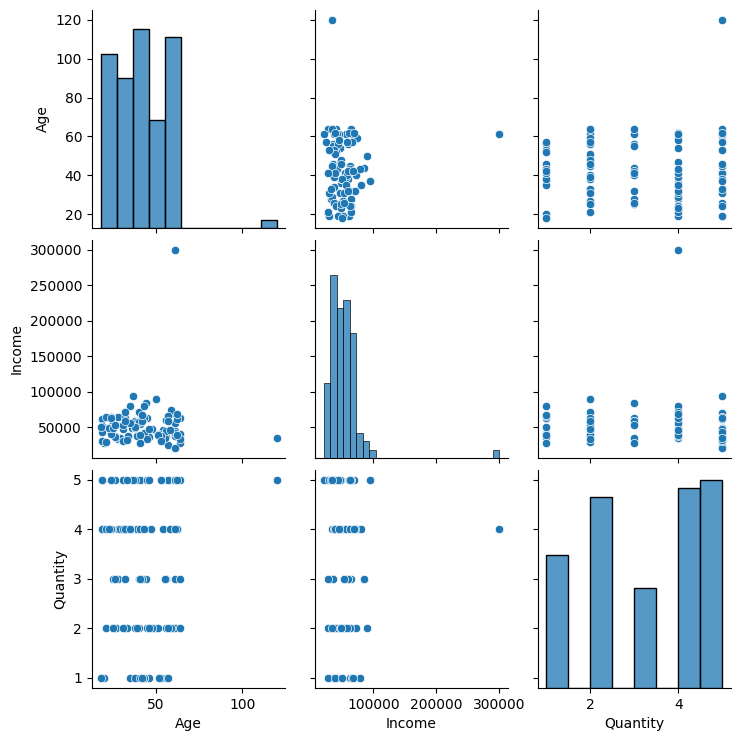

In [31]:
import seaborn as sns
sns.pairplot(df)

In [32]:
df.columns

Index(['Age', 'Income', 'Gender', 'Product', 'Quantity'], dtype='object')

In [33]:
# Assuming df is your DataFrame
df.drop(df[df['Income'] > 200000].index, axis=0, inplace=True)
df.drop(df[df['Age'] > 100].index, axis=0, inplace=True)


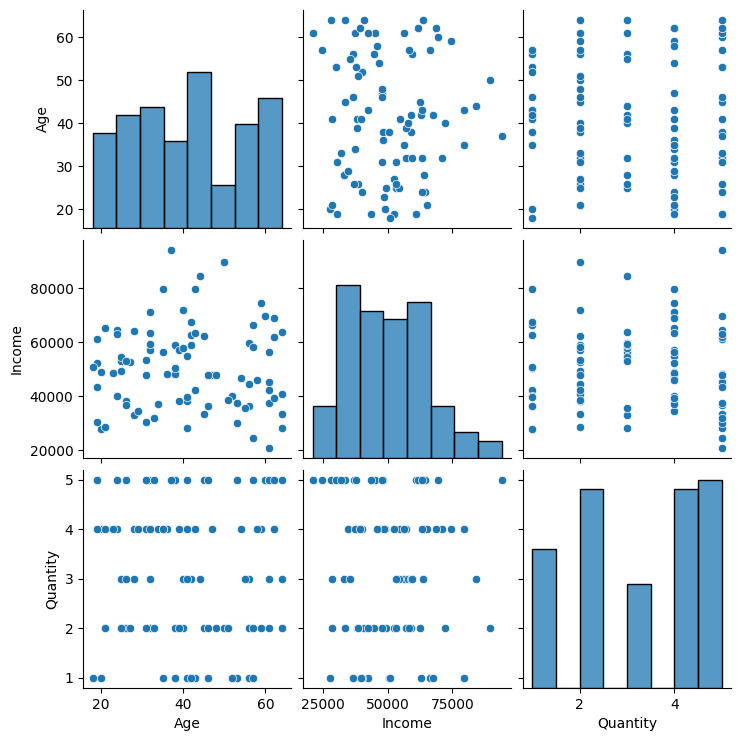

In [34]:
sns.pairplot(df)

<Axes: >

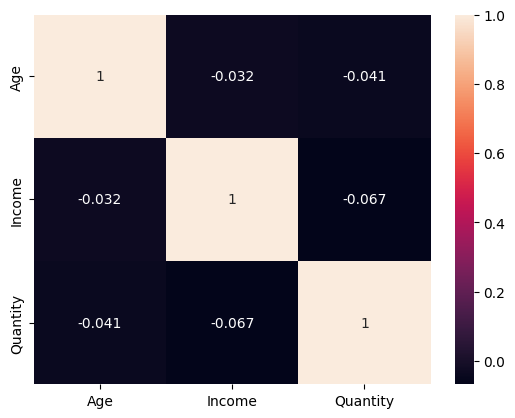

In [35]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [36]:
dc = df.copy()

In [37]:
x=df.drop(columns = ['Income'],axis=1)
y=df['Income']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [51]:
pd.get_dummies(df[['Gender','Product']],dtype=float)

,Gender_Female,Gender_Male,Product_A,Product_B,Product_C,Product_D
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
93,1.0,0.0,0.0,0.0,0.0,1.0
94,0.0,1.0,0.0,0.0,0.0,0.0
95,1.0,0.0,0.0,1.0,0.0,0.0
96,0.0,1.0,0.0,0.0,0.0,1.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

ValueError: could not convert string to float: 'Female'